In [1]:
%matplotlib inline
import numpy as np
from numpy.linalg import inv
from math import sqrt
import matplotlib.pyplot as plt
from sr_main import run_experiment

In [2]:
def init_default_config():
    config = {'switch_reward': False,
              'terminal_step' : 100000,
              'switch_reward_at_step' : 50000,
              'episode_length' : 20,
              'maze_type' : 'twobytwo',
              'maze_params' : {
                  'row' : 2,
                  'col' : 2,
                  'start_row' : 1,
                  'start_col' : 1
              },
              'learning_alg_params' : {
                  'alpha' : 0.01,
                  'gamma' : 0.9,
              },              
             }
    return config

## Question 1: Learning SR using TD(0)

In [3]:
config = init_default_config()
result = run_experiment(config)
terminal_step = config['terminal_step']
approx_Phi_pi = result[terminal_step-1]['Phi_pi']

In [4]:
# Calculate exact phi_pi for 2x2 gridworld
state_len = config['maze_params']['row']*config['maze_params']['col']
exact_Phi_pi = np.zeros((state_len, state_len))
gamma = config['learning_alg_params']['gamma']

P_pi = np.array([[0.5, 0.25, 0.25, 0.],
                 [0.25, 0.5, 0., 0.25],
                 [0.25, 0., 0.5, 0.25],
                 [0., 0., 0., 1.]])
exact_Phi_pi = inv(np.identity(4)-gamma*P_pi)

In [5]:
print(exact_Phi_pi)
print(approx_Phi_pi)
print(np.sum(np.abs(exact_Phi_pi-approx_Phi_pi)))

[[ 2.73291925  1.11801242  1.11801242  5.0310559 ]
 [ 1.11801242  2.27555054  0.45736872  6.14906832]
 [ 1.11801242  0.45736872  2.27555054  6.14906832]
 [ 0.          0.          0.         10.        ]]
[[ 2.65554703  1.18091669  1.05378635  5.10974992]
 [ 0.9570572   2.44015783  0.37132967  6.2314553 ]
 [ 1.11148477  0.50520643  2.23019199  6.15311681]
 [ 0.          0.          0.         10.        ]]
0.8809575279698463


## Question 2: Value Prediction with SR


In [6]:
r1_pi = np.array([-1, -0.75, -0.75, 0.0])
r1_pi = r1_pi.reshape(4,1)
r2_pi = np.array([-0.75, -1, 0., -0.75])
r2_pi = r2_pi.reshape(4,1)

print(r1_pi)
print(r2_pi)



[[-1.  ]
 [-0.75]
 [-0.75]
 [ 0.  ]]
[[-0.75]
 [-1.  ]
 [ 0.  ]
 [-0.75]]


In [7]:
exact_V_pi_R1 = exact_Phi_pi.dot(r1_pi)
approx_V_pi = approx_Phi_pi.dot(r1_pi)
td_V_pi = result[terminal_step-1]['V_pi']
print(exact_V_pi_R1)
print(approx_V_pi)
print(td_V_pi)

[[-4.40993789]
 [-3.16770186]
 [-3.16770186]
 [ 0.        ]]
[[-4.33157432]
 [-3.06567282]
 [-3.16303359]
 [ 0.        ]]
[[-4.62176897]
 [-3.2634419 ]
 [-3.35179501]
 [ 0.        ]]


## Question 3: Tracking with SR

In [8]:
config['switch_reward'] = True
result = run_experiment(config)

state_len = config['maze_params']['row']*config['maze_params']['col']
terminal_step = config['terminal_step']
switch_step = config['switch_reward_at_step']
approx_Phi_pi = result[terminal_step-1]['Phi_pi']

In [9]:
exact_V_R1 = exact_V_pi_R1 
exact_V_R2 = exact_Phi_pi.dot(r2_pi)

V_pi_sr = np.zeros((state_len,1))
V_pi_td = np.zeros((state_len,1))

err_sr = []
err_regular_td = []
for s in range(terminal_step):
    if s <= switch_step:
        V_pi_sr = result[s]['Phi_pi'].dot(r1_pi)
        err_sr.append(np.sum(np.abs(V_pi_sr - exact_V_R1)))
        
        V_pi_td = result[s]['V_pi']
        err_regular_td.append(np.sum(np.abs(V_pi_td - exact_V_R1)))
    else:
        V_pi_sr = result[s]['Phi_pi'].dot(r2_pi)
        err_sr.append(np.sum(np.abs(V_pi_sr - exact_V_R2)))
    
        V_pi_td = result[s]['V_pi']
        err_regular_td.append(np.sum(np.abs(V_pi_td - exact_V_R2)))

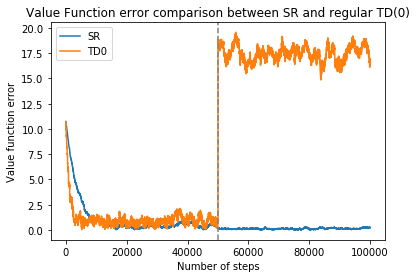

In [10]:
# Plotting value function error for the two algorithms:
plt.ylabel('Value function error')
plt.xlabel('Number of steps')
plt.title('Value Function error comparison between SR and regular TD(0)')
plt.plot(err_sr, label='SR')
plt.plot(err_regular_td, label='TD0')
plt.axvline(x=switch_step, color='grey', linestyle='--')
plt.legend()